## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline


In [6]:
# set path
path =r'/Users/juliapetke/Desktop/Julia Petke- Boat Sale'


In [7]:
# Import Data
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'Boat Sale_data_cleaned.csv'), index_col = False)

### 2. Data cleaning

In [7]:
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Material',
       'Location', 'Number of views last 7 days'],
      dtype='object')

In [8]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Material,Location,Number of views last 7 days
0,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,Germany Â» BÃ¶nningstedt,75
1,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
2,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,GRP,Switzerland Â» Seengen,239
3,EUR 3500,Sport Boat,GS Nautica power boats,Used boat,2004,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69
4,CHF 4600,Runabout,Kimple power boats,new boat from stock,2020,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113


In [9]:
df.shape

(6589, 8)

In [10]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Material                       0
Location                       0
Number of views last 7 days    0
dtype: int64

In [11]:
df.dtypes

Price                          object
Boat Type                      object
Manufacturer                   object
Type                           object
Year Built                      int64
Material                       object
Location                       object
Number of views last 7 days     int64
dtype: object

In [8]:
# Convert the 'Price' column to string before splitting
df['Price'] = df['Price'].astype(str)

# Split the 'Price' column into 'Currency' and 'Price'
df[['Currency', 'Price']] = df['Price'].str.extract(r'(\D+)\s*(\d+)', expand=True)

In [9]:
#  Insert the 'Currency' column next to the 'Price' column
cols = list(df.columns)
price_index = cols.index('Price')
cols.insert(price_index, cols.pop(cols.index('Currency')))
df = df[cols]

In [14]:
df.head()

,Currency,Price,Boat Type,Manufacturer,Type,Year Built,Material,Location,Number of views last 7 days
0,EUR,3490,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,Germany Â» BÃ¶nningstedt,75
1,EUR,3399,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
2,CHF,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,GRP,Switzerland Â» Seengen,239
3,EUR,3500,Sport Boat,GS Nautica power boats,Used boat,2004,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69
4,CHF,4600,Runabout,Kimple power boats,new boat from stock,2020,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113


In [10]:
# Rename the columns in the same way as in Exercise 6.2.

# Automatically fix encoding issues with 'Location'
df['Location'] = df['Location'].apply(lambda x: x.encode('latin1', errors='ignore').decode('utf-8', errors='replace'))

# Now split 'Location' into 'Country' and 'State'
# Use 'n=1' to limit to two parts only (Country and State)
location_split = df['Location'].str.split(' » ', n=1, expand=True)

# Create a new column called 'Country' and assign the first part of the split
df['Country'] = location_split[0]

In [16]:
df.head()

,Currency,Price,Boat Type,Manufacturer,Type,Year Built,Material,Location,Number of views last 7 days,Country
0,EUR,3490,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,Germany » Bönningstedt,75,Germany
1,EUR,3399,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,Germany » Bayern » München,58,Germany
2,CHF,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,GRP,Switzerland » Seengen,239,Switzerland
3,EUR,3500,Sport Boat,GS Nautica power boats,Used boat,2004,GRP,Italy » Lake Garda » Moniga del Garda (BS),69,Italy
4,CHF,4600,Runabout,Kimple power boats,new boat from stock,2020,Aluminium,Switzerland » Zugersee » Neuheim,113,Switzerland


##### Extreme values checks

/var/folders/zd/kwmllg996knd4mqrwq8n_vf80000gp/T/ipykernel_9635/3020178489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], bins=25) # Shows extreme values


<Axes: xlabel='Price', ylabel='Density'>

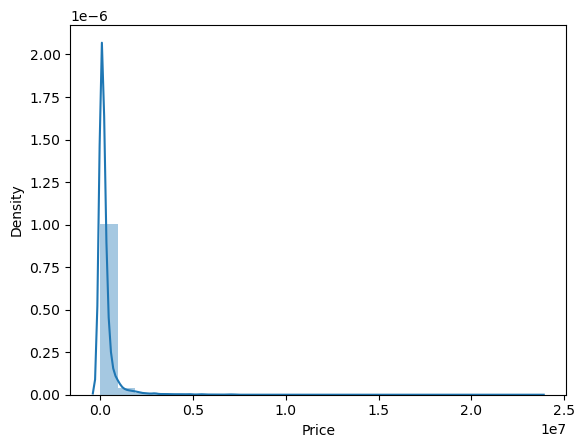

In [14]:
sns.distplot(df['Price'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
#Create a correlation matrix using pandas
# Convert 'Price' to numeric (if they are stored as int type)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [13]:
df.dtypes

Currency                       object
Price                           int64
Boat Type                      object
Manufacturer                   object
Type                           object
Year Built                      int64
Material                       object
Location                       object
Number of views last 7 days     int64
Country                        object
dtype: object

In [11]:
df['Price'].mean() # Check the mean

TypeError: Could not convert string '34903399350035004600450040003999393039004200403039753950380038003800350055005500550059005399520055005500720065906500650065006500650064907000700070008300764081557500750075007500750075009400926592008500850085008500975010500104009599957595539500950095001100011000110001011510900100001000010000100001000010000100001100011000110001100011000110001100011000110001100010999109991099910990109901200012000120001200012000119901295012900129001277012500125001250012500148001369014700135001350013500135001350013500135001350014500156001436615500142001400014000140001490014900149001490014900149001490014900149001550015500155001550015500154991549015446154001768417500162201619017500174001740016000169001690016900169001690016900169001690018260168701821018200182001750017500175001749017490189001890018900195001800018000180001800018000180001880018750187001869020000199901999020100199001990018515195001950019500195001950019490210002095019300208001990019900199001990019900199001990019900199001990019900199001990020499204902211022000220002200022000220002200022000213962300023000230002290022900210902100021000210002100021000220002200022000220002200022000228802285022800227722276522700226802450024500245002252023640255002353023500250002500025000250002500023290249002599026000260002595024000240002400024000240002400024900249002490024900249002490024900249002490024900249002490025000250002500025000250002500025000250002500025000250002800025900259002590025900259002590025900259002680028900289002890028900289002670026700266202850028700265372950029500295002950029500271202920027000270002790027900279002790027900279002790029900299003100028546285002850028500285002850028500285002900029000290002900029000290002900029000290002900029000299002990029900299002980029800298002965032000220000295003000030000300003000030000300003000030000300003000030000309003090030825308203081033000279953069933000327303200032000345003190031900319003190031830290003434034000325003250032500325003250032500324903300033000330003300033000330003300033000330003300033000330003300034000340003400034000340003390033900339003390034900349003490034900349003490034900349003490034900348283480034800350003500035000350003500035000350003500035000350003500035000350003549935450354193540035250352003520038000380003800038000380003795036414390003900039220362503917039000390003895036000404594000040290399004004037000370003700037000370003700038000380003800038000380003800038000380003800038900389003890042000420003879438748387004200042000422703900039000390003900039000390003900039000390003900039888398004300039750428004280039500395003950039999399993999039950399223990039900399003990040999409004080043990406503692840500404654041041900419004190041900419004190041900418844176641666450004500045000424994590042300423004570042200465174300043000430004300043000430004300043000430004300043000440004400044000440004400044000440004400044000440004400043999439044490044900449004490044900449004490044900449004850045000450004500045000450004500045000450004500045000450004890048500485004879033500033500045000450004500045000450004500049990499684620049900499004990049900499004600046000460004600046000471005090035000047000470004700047000470004700047000470003490004800048000480004800048000480004800048000480004800048000480004800049000490004900049000490004900049000490004900049000495004950049499494904945049300493004990049900499004990049900498905392053900498504985049800498004980050000500005000049999499994995049950499504994950652505904595050200502005408650000500005000056270520005200052000520005200052000520005200058000536485356557900535005349939500053049545005450054490589005437054370543705437054106540705500055000550005500055000550005500055000550005499959000550005500055000550005500055000550005500055000550005500055000550005600056000560005600056000560005600056000560005600056000560006045462000620005703557000570005700057000570005700057000570005810058000580005800058000580005800058000580005800058000580005900059000590005900059000590005900059000590005900059000590005950059500595005950059500595005950059500595005933063800638005900059900599005990059900599005990059900599005990059900600406004060040600406000060000600006000060000600006000060000621006200062000620006200061950619006190066740617136600068000684486300663000630006300063000630006450064500644906449069714643756900069000695006950064082650006500065000650006500065000649906500065000650006500065000650006500065000650006624066043660006600065990659906590065900659006790067816725006750067500675007290067300727007200069000689006890068900689006890068900687006870068600690006900069000690006900069000690006900069000690006900069000699006990075521749506980069750697507480069700696507000070000700007000070000700007000070000700007000069999715007150077154530000769007100070990709007090076500730007300073000730007290072900729007880078750725007250072500725007250072500745007424574229800008000080000800007400075000750007500075000750007500075000750007500075000750007500075000750007500075000750007500075000750007500075000835007723183450770007700077000770007700077000699507890078900850008500078540785007850078500845008432978000790007900079000790007900079000790007900079000790007990079900799007990079900799007990079800798007269579600860007955072495795008000080000800008000080000800008000080000800008000089500825008250082500890008900089000820008200084950849008490084900849008490084500845008450090909625000625000850008500085000850008500085000850008500085000850008500085000870008699086990869008679079000865008644993210925009250093000930009300088900960009600096000960008875095940886589500095000955009530788000880008900089000890008900089000890008900089000899008990089900899008990089900899008965089650969009690096856990009800098000985009780090282900009000090000950009490094900948009475010216894000940009400094000950009500095000950009500095000950009500095000950009773397650976319762597500105000104900104900970009700097000899508995089950985009850098500985009850098300981909800098000990009900099000990009900099000990009900099000990009990099900999009990099890998009980010100075000010018510000010000010000010000010000010000010500010500010500010500010500010500010500010500010500010500010500010900010899210890011758510800010800010800010788010750079800011500011570011000010999010990010990011880099999999509995099950111950111600111350111350120000111000119900825000119398110200119000119000110000115000115000115000115000115000115000115000115000114990114969114900116537116000116000116000115900115900125093125000119000119000119000119000119000119000119000119000119000120000120000120000120000120000120000120000120000120000119999119990130000130910129900109950130290129800120000120000120000120000120000120000125000125000125000125000124900124900124900124900124900124712114950114950126000126000125990125900135000136000135340125000125000125000125000129000129000129000129000129000129000129000129000129000129000129000129000130000130000130000130000130000130000130000130000130000130000145000134000134000133900995000133500133500144000133000135000135000135000135000135000135000135000135000135000139000139000139000139000139000139000139000139000139000138810150000140000140000151285139900139900139900139900139900139500139500139500143819155000143000142900142800129999142576129950142500142500142000142000141900145900145800145000145000145000145000145000145000145000145000145000145000145000149000149000149000149000149000149000149000148700148500149900149900149900149600149500149500149500151310150565162500150000150000150000150000150000150000150000155000155000155000155000155000155000155000155000155000155000155000155000159000159000159000159000159000159000159000159000159000159000159000159000160000160000160000160000160000160000160000160000160000165000165000165000165000165000165000165000165000165000165000165000169000169000169000169000169000168500168000168000168000170000170000170000170000170000170000170000170000170000170000170000175000175000175000175000175000175000175000175000175000175000175000175000179000179000179000179000179000179000178900180000180000180000180000180000180000180000180000180000180000180000180000187000138750013875001859001854621850001850001850002050001895001725001890001890001890001890001890001890001950001950001950001950001949001949001943002100001940001940001939202090001975001974311468500197000197000197000196000195755210000199000199000199000199000199000199000199000199000199000199000199000199000199000199000200000200000199999199990199900199900199900199900199900199900199900199900199900209000209000209000209000208000189000205000205000205000205000205000205000212000212000229000211800157500021000021000021000021000021000021000021000019900021800021800023500021659023290021500021500021500022000022000022000022000022000022000022000022000022000022500022500022500022500022500022500022500022500022500022500022500022500022500023000023000023000023000023000023000023000023000023000023000023000023800023800023800023770023750025674023700025546821495021495025480024000024000024000024000024000024000023990023989623919024500024500024500024500024500024500024500024500024500024500024500024900024900024900024900024900024900024900024900024900024900024900024900023000022995025138822900025100025100025000025000025000025000025000025900025900025900025900025900025900025900019240002580002650002650002650002650002650002650002650002650002699002695002695002694002690002690002690002690002690002690002690002690002690002690002750002750002750002750002750002750002750002750002750002750002750002750002549503000002795002790002790002790002790002790002790002790002790002790002790002790002850002850002850002850002850002850002850002850002840002900002900002900002900002900002900002900002900002900002900002900002900002950002950002950002950002950002950002950002950002950002950002990002990002990002990002990002990002990002990002990002990002990002990002990002990002990003100003100003100003093502300000309000308000332024279000305000305000305000329500319000319000319000289950289950318000317849316417315665326000325000325000325000325000325000325000325000325000250218825000003350003350003350003350003312963300003480003450003450003450003450003450003450003450003405003500003500003500003500003500003500003500003500003499003600003600003599003280003590003590003590003590003590003745003733503729003390003700003700003700003850003850003807413800003800003800003800003800003800003800003800003570003909303900003900003900003900003900004214503895003990003990003990003990003990003990003990003990003990003990003990003990003990004150004150004150004150004150003750004100004100004100004090004090004300004300004300004300004291114290004290004290004290004290004290004290004290004290004490004480004467604467604450004450004450004450004800003299000441666495000457198457198456796455000453000450000450000475000475000475000475000475000475000475000475000473304473000473000490000490000490000490000490000490000490000490000489900455000455000499000499000499000499000499000499000499000499000499000499000499000535441535000535000535000534000530000530000530000530000530000529000529000479000550000550000550000550000550000550000550000550000550000550000550000550000578600576384575000573936572200519950570000570000570000570000595000595000595000595000595000595000595000594000590000590000625000625000460000056235261500045731255600006100006100005499506002406500006500006500006500006500006500006495006490007500006900006900006900006900006900006900006890006860006250006200007480007450007450005504063735000730000730000730000729000729000725000725000536062579000079000078900078500078084078000078000077900077617977500077500070500077200083500083000083000082900082500075000074995074950082000081420079900087430679500087000087000087000086900086800079000086500093000092510592000090610082500090000090000090000090000089900089500099000099000098990010600008999009840009834249800009800001050000105000095000094900010400001027774102000010200009250009250001150000115000011500001150000115000011500001040000103873411000001149000125000012500001250000125000012500001250000125000012490001135000124500014000001395000139140013914001390000139000013900001385000137500012499951595000145000015900001590000159000015750001567638142500015500001550000185000018500001839768180000018000001800000179500017950001634995179000017850001995000199500021700002150000195000019500002100000210000021000002100000205000020160002650000239500026200002600000250000025000002500000250000032500003500000344758034100003400000340000033900002995000320000032000005500000540000054000005400000485000047800005208850499500011900000110000009995000108000001050000099000002350000092500008800000835000079000007200085685000072500006500000710000063600006950000625000068000005995000575000056351535900000490000049000004800000480000046000004500000439500043500004300000425000038500004200000415000041000003650000396000035950003900000385000037500003690000320000028950002785000278500030000002990000295000029500002950000295000029000002900000290000028990002509220275000027000002420000265000024900002265000226500024500002450000219500024000001757812523500002105000210500020990002300000230000022500002200000220000022000001995000200000019950001995000199000019850001980000197500019500001950000194500019000001890000187500016950001850000185000018500001780000159500017500001750000175000017500001750000129375001705992170000017000001700000169900016990001695000169000016850001650000160773016030491595000155000015490001500000150000015000001500000150000015000001500000149900014990001499000149500014900001490000145000014500001450000130181414029951371535124900013500001350000134900013390001312560130000013000001300000129500012900001289000128500012805001275000127000011500001232966122277611000001203950120000012000001200000120000011976001195000119000011900001184590118000011800001175000116376010500001049000104900011500001150000110000011000001100000110000011000001100000109550010950009950009950009950001090000109000099000099000010850001084800108000097500010660001059295105360099900099900099850099800099500099500099000099000099000099000099000099000099000099000099000099000099000099000099000097500097500088000096000096000070875009500009500009500009500009500009500009500009500009500009490009490008650009450009450009300008950008950008950008925008910008900008900008900008900008900008900008890008854508800008800008850008800008800008790009500007999507998008627058500008500008500008500008500008490008490008490008490008490008490008490008490007669997650008390008380008100008000008000008000008000007999007990007990007990007990007990007990007990007950007950007950007900007900007900007900007900007900007690007500007500007500007500007500007500007500007500007500007499997495008100007490007490007490007490007490007200007190007150007150007000007000007000006999006990006990006980006980006980006950006950006950006950006950006950006800006800006800006783006750006750006750006749996711546700006700006700006618706590007115415990006570006569205950006490006490006490006490006490006490006490006490006450006450006450006434405850005799505750006300006300006290006290006250006250006250006000006000006000006000006000005990005990005990005990005990005990005990005990005990005980005950005950005950005950005900005900005900005900005900005900005900005900005900005890005879335850005850005850005800005800005800005800005800005799005790005790005700005700005690005690005650005650004200000560000560000560000560000560000560000560000559500559241559000553576550000550000549500549000549000549000549000499950548000499000545000545000545000540000540000540000540000539000539000539000539000539000399900052500052500052500052500052440047500052000052000052000051990051900051700051500051500051499050000050000050000050000049999949900049900049900049800049800049800049800049573749500049500049500049500049500049500049500049500049500049500049400049000049000048900048900036375004450004880003630000444000481908480000480000480000480000480000480000480000437506479900479000479000479000470000470000470000470000470000469000469000469000469000469000468000465000465000465000463000462360419950419950460428460000460000460000460000459000459000459000450000450000450000450000450000450000450000450000450000450000450000450000450000449500449000449000449000449000449000449000449000449000449000440000440000440000440000440000440000440000439000439000439000439000439000439000439000438000438000399000437000435000435000435000395000433258430200430000430000430000430000430000427000425310425000425000459000385000455490420000420000420000420000420000420000419900419000419000417417405000369000299900029980002992500400000400000400000400000400000400000400000400000399990399900399500399500399000399000399000399000399000399000399000399000398000398000430000397500397500397000396000395000395000395000395000395000395000395000395000395000393600389000389000389000389000389000389000389000389000389000389000389000389000288750038800038800038700038538038500038500038500038500038500038500037900037900037900037900037900037900037900037900037900037860937800037500037500037500037500037500037500037500037500037500037500037500037500037000037000036990036990027496883690003690003690003690003690003690003690003687503680003350003670003650003650003650003650003650003645703900003600003600003590003590003590003580003860003250003250003250003550003550003550003550003550003550003828363795003500003500003500003500003500003500003500003500003499003499003495003490003490003490003490003490003490003490003490003490003490003490003490003490003490003490003490003400003400003400003399903399003399003395003390003390003390003390003390003390003390003390003390003390003380833379003650003300003300003300003300003300003300003300003300003300003300003291503290003290003290003290003290003290003290003290003290003290003270003500003250002950002399200320000320000320000320000320000320000320000320000320000320000320000319900319490345000345000319000319000319000319000319000319000315000315000315000315000315000315000314000285000311302310000310000310000310000310000310000310000310000310000304000301784301762325000300000300000300000300000299900299900299500299000299000299000299000299000299000298000298000298000298000298000298000298000297900297357297115270000295250295000295000295000295000295000295000295000295000295000295000295000295000295000294900294000292000292000291500315000291150264950264950313900290000290000290000290000290000290000290000290000289999289500312538289000289000289000289000289000289000288500286800213000028545026000028500028400021000002820002569502800002800002800002800002800002800002800002800002800002800002800002800002800002799002790002790002790002790002790002790002790002790002787892780002780003000002999002770002770002762002980002754452750002750002750002750002750002750002750002750002750002749992749002749002499502499952499502740002950002950002950002720002935002900002700002700002700002700002700002700002700002700002700002700002699002690002690002690002690002690002690002450002450002680002880002657272650002650002650002650002650002650002650002650002650002650002650002850002850002399502630002800002600002600002600002600002600002600002600002600002600002600002595002590002590002580002780002568002560002560002550002550002550002550002550002550002550002549002750002540002533702530002528002500002500002500002500002500002500002500002500002500002500002500002499002499002499002499002498412700002495002490002490002490002490002490002490002490002490002490002488002487001850000248000248000247820247000245000245000245000245000245000244000243000242750242000242000260809260000260000260000219000218950240023240000240000240000240000239000239000239000239000239000239000239000239000239000239000239000239000239000239000239000238900238360238000235000235000235000235000235000235000235000235000235000235000235000235000234900234800173538223200025000024900022990022990022950022900022900022900022900022900022900022900022900022900022900022900022900022900022900022897522800016950002460002275001680000225000225000225000225000225000224916224391224200224000223129165750023805022000022000022000022000022000022000022000022000021990019999919999021950021950021950021950021900021900021900021900021900021900021900021900021900021900021900021900021900021500021500021500021500021500021500021500021500021500021500021500021500021500021500021500021500021490015950002299002140002140002140002139001950002136002130002130002100002100002100002100002100002100002100002100002100002100002100002100002100002100002100002100002100002099002099002090002090002050002050002050002039002034312199002195002005162000002000002000002000002000002000002000002000002000002000002000001999001999001999001999001995001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001988631985001985001980001980001980001980001980001980001980001980001980001980002110001950001950001950001950001950001950001950001950001950001950001950001950001950001950001950001950001950001950001950001950001950001950001950001930001925702040002040001900001900001900001900001900001900001900001900001900001900001900001900001900001900001900001900001900001899001899001890001890001890001890001890001890001890001890001890001890001890001890001890001890001890001890001890001890002040001880001880001880001875001850001850001850001850001850001850001850001850001850001849001846111995001988491833001820001350000196000165000164950195000195000195000180000180000180000180000180000179950194500179900179500179500179500179500179500179500179500179000179000179000179000179000179000179000179000179000179000179000178000178000178000177900177090176615176000175848190000190000189900175000175000175000175000175000175000175000175000175000175000175000175000175000174900174900174900174900174500174500174500186900174000174000187980173455173320173000186816172700172000172000172000185000185000170000170000170000170000170000169900169900169500169500169000169000169000169000169000169000169000169000169000169000168000168000168000167000180000166000165900179000179000165490165000165000165000165000165000165000165000165000165000165000165000165000165000165000165000165000164790164500149950164000163000163000162000175000120000016100016066016057516000016000016000016000016000016000015990015990015990015990015990015950015950015950015950015935915906114500015900015900015900015900015900015900015900015900015898815890015835015800015799015769215750014338415700015600016824116824116800016800015500015500015500015500015490015464416700015439316664015400015400015400015400013995015364013995013995013950016500015226515220015203515200015200015200015150015000015000015000015000015000015000015000015000015000015000015000015000015000015000015000015000015000015000015000015000015000014995014950014950014911114907014900014900014900014900014900014900014900014900014900014900014900014900014900014900014900014900014900014900014900014900014900014850015900013495013495013495016000014800014800014800014800014800014750014750014750014750014722010950001467001580001459001450001450001450001450001450001450001450001450001450001450001450001450001450001449001449001447141550001439001417561416861413221405401400001400001400001400001400001400001400001400001400001400001400001400001400001400001400001400001395001395001495001390001390001390001390001390001390001390001390001390001390001390001390001390001390001390001390001385001380001380001380001380001380001257501490001249951249501370001370001370001369001365601472651459001352471350001350001350001350001350001350001350001350001350001350001350001350001350001350001350001350001350001350001350001350001350001350001350001349001345001344381450001450001430001320001320001320001199501310001310001190001190001400001399001300001300001300001300001300001300001300001300001299991299991299001297501297309650009650001295001295001295001295001290001290001290001290001290001290001290001290001290001290001290001289741175001390001390001285001280001280001280001280001380001275001374041270001270001270001270001269001269001250001250001250001250001250001250001250001250001250001250001250001250001250001250001250001250001250001250001346301345001345001344601342661240001240001240001240001234681325001324901324631220001220001219001219001216001215001213801200001200001200001200001200001200001200001200001200001200001200001200001200001200001200001200001200001200001200001199001199001197001196001195001195001195001195001195001290001190001190001190001190001190001190001190001190001190001190001190001190001190001190001190001190001190001190001190001185001280001180001180001180001178001177808750001259001259001265001170001153761246161050001050001245001150001150001150001150001150001150001150001150001150001150001150001150001150001149001149001147081139501139001139001230001185001130001130001220001219001123301123201211491120001120001100001100001100001100001100001100001100001100001100001100001100001100001100001100001100001100001100001100001100001100001100001100001095001095001095001090801090001090001090001090001090001090001090001090001090001090001090001090001090001090001090001070001070001070001069001063951150001061891050001050001050001050001050001050001050001050001050001050001050001050001050001050001049901049821047711130951045441043009495095000104000103718103240102730102000110000110000110000109900109000101500101299109499100000100000100000100000100000100000100000100000999999999999990999909999099900999009990099900995009950099500995009950099500995009950099490990009900099000990009900099000990009900099000990009900099000990009900099000990009900099000990009900099000990009900099000990009900099000990009900099000107000989009888010689398800988009800098000980009800098000980009800098000980009800098000980009800098000980009790097900977509650010390096000960009600095999959009586995790956009500095000950009500095000950009500095000950009500095000950009500095000950009500095000950009500095000950009500095000950009390010101885000930189300093000995009257292572100050925009250092487999009240792271921409200092000920009199991984919009000090000900009000090000900009000090000900009000090000900009000090000900009000090000900009000089999899908995089500895008950089500895008900089000890008900089000890008900089000890008900089000890008900089000890008900089000890008900089000890008900089000890008900089000890008900089000890008800088000880008800088000879008790095000950008778587500875008750087429941908700087000870008700087000870008600086000860008600086000860008596285900920008565085630925007795085000850008500085000850008500085000850008500085000850008500085000850008500085000850008500085000850008500085000850008500085000850008500085000840008400084000840008400084000840009000089900834909000083000830008300083000830008300083000896658290082878895008200087900743958800088000814008100080900809008050087000870005980008600086000800008000080000800008000080000800008000080000800007999979999799907999079940799007990079900799007990079900799007990079900799007990079500795007950079500795008550085420790007900079000790007900079000790007900079000790007900079000790007900079000790007900079000790007900079000790007900079000790007900079000789997800078000780007800078000780007800078000780007790077900778858407077582775277750077500775007750083000829007667576500820008250082500760007600076000760007590075800818387567775650754466876875408753007500075000750007500075000750007500075000750007500075000750007500075000750007500075000750007500075000750007500074998749907499074990749007490074900749007490074900749007490074900748007470074580745007450074500745007450074500745007450074000740007400074000739907990079900549000790007900079500735006695079000730007300073000730007300073000730007300073000725007250072200780007800072050720007200072000720007200072000720007200072000720007200071900719007190071832768007150071500763707624070500760007583170000700007000070000700007000070000700007000070000700007000070000700007000070000700007000069999699996999569990699906995069950699506990069900699006990069900699006990069900699006990069900699006990069900699006990069900699006990075142695006950069500695006950069500695006334569460694007500075000749006900069000690006900069000690006900069000690006900069000690006900069000690006900069000690006900069000690006900062495685006850068310680006800068000680006800068000680006800068000680006800068000679837290067900679006790067000670006700067000669906699049800066900669006690066900668006680072000720007200072000720006659066500665006640066300662505995059950657006550059500700006522570500650006500065000650006500065000650006500065000650006500065000650006500065000650006500065000650006500065000650006500065000650006500065000650006500065000650006500065000649906496064960649006490064900649006490064900649007014764879648506480064800590006992569924699006990069900699006459964539583926400064000640006400064000640006400063999639906395063900690406850068500690006900063685688006353063500634995781963000630006299568000680006800068000629006290062900628006280062800626656250062500625006755867500624006216761500615006150066412611666110761000610006100060999609006075360580650004500004500004490005500060000600006000060000600006000060000600006000060000600005999059990599905999059990599635995059950599005990059900599005990059900599005990059900599005990059850597006450059500595005950059500595005950059500595005950059000590005900059000590005900059000590005900059000590005900059000590005900059000590005900059000590005899558940589005890058900588505880058729587006329063278585005850058500584105836952995580005800058000580005800058000580005800057950579006250062500620005750057500620006200062000570005700057000569995699556900569005690056650612005650061079606405604956000560005600060000559005590055900559005990055823603275555555500555005950059500599005990059890552905954055000550005500055000550005500055000550005500055000550005500055000550005500055000550005500055000550005500055000550005500055000550005900059000549505490054900549005490054900549005490054900499504995049950499505469954640546345900059000590005900054540545005450054500580005400054000540005400054000540005400054000540005400053999539985390053900539005390053900539005390053900581905380053799537545300053000530005300052999529995296952969529005290052850527905690052600525005250052500565005220347460519995190051900519005190055900516585580051500515005150051500555555129055000550005117551015510005090055000378000549005490054900500005000050000500005000050000500005000050000500005000050000372000500005000050000500005000050000539904990049900499004990049900499004990049900499004990049900499004990049900499004990049900499004990049900499004956049529495004950049500495004950049500495004950049500495004950049500495004950049270530605300049000490004900049000490004900049000490004900049000490004900049000490004900049000490004900052900529004890048900489004850048500520005200052240520004806451900480004800047999518804799047950479004790047800515905157047520475004750047500475004750047500473834738346900469004690046900427004680046800468005039050390465004650046500465004980046407501404626050000500004999549990460004600045999459904599045900459004590045900459004590049500495004950049500493904555345500455004550041435490004900049000490004900049000450004500045000450004500045000450004500045000450004500045000450004500045000450004500045000450004500045000450004500045000450004500045000450004500045000450004500044999449994499944990449904498044950449004490044900449004490044900480004800044500445004450044499444904806047900479004429047500442004419044125440004390043900439003995043845399504380043690436734680043500435004336739500433024674043200467004663846611430804300039200429804295042950429504290042900429004290042800460884260046000425004250042500425004250042500420464200042000420004200042000420004200042000420004200042000420004200042000420004200042000420004199941990419504500045000450004490041500415004150041500415004150041500415004150041467413954457044500440004100041000410004100041000410004000040000400004000040000400004000040000400004000040000400004000040000400004000040000400004000039999399003990039900399003990039900399003990039900399003990039900399003990039900399003990039900399003990039900399003990039500395003950039500395003950039500395003950039500395003595039390425003915139000390003900039000390003900039000390003900039000390003900039000390003900039000390003900039000390003900038999389993895038900386423864038600385003850038450383404139238280382754128938042380243799038000380003800038000380003800037990379903790037900379003790037780376254057037500375003750037500375003750037500375003700036999275000275000399003990039900399003690036900369003690039840398003950036729395003650036500364903600036000360003600036000360003600036000360003600035990359903593835900359003590035900359003850035800358003250035500379003502035000350003500035000350003500035000350003500035000350003500035000350003500035000350003500035000350003500035000350003500035000350003500035000350003499034990349903499037800349403490034900349003480034800375903750034510345003450034500345003450034499371003430037000370003690036900340503390033900339003390033900338403376536400336003600033500333333600036000359003590035780330253301533000330003300033000330003290032900329002995035500328003540035000350003500035000326083259034960349503250032500325003250032490350003500035000349903490034900348003211032109320603200032000320003200032000320003200032000320003168534200341503150031500286903400034000314003139933900338233360031059310003100030999309003090030499329003035532800302003240027500274953230030000300003000030000300003000030000300003000030000300003000029995299902999029990299902990029900299002990029900299002990029900299002990029900299002990029500295002950029500295002950029500295002950029500294003153029155315002900029000290002900029000290002900029000290002900029000290002900029000290002500028990289902890028900289002890028900310002850028500283903069020900028000280002800028000280002800028000280002800028000280002800028000280002800027999279903000027954277992778530000299902769929900299002765529888298002750027499274902970025000249502700027000270002700027000270002700027000270002700027000270002700026999269002690026900269002690026900269002690026900290002900026500265002650026500265002640028500285002600026000260002600026000260002600026000260002600025999259992599025950256802750027500255902550025500255002550025500253902719025000250002500025000250002500025000250002500025000250002500025000250002500025000250002500025000249992499924999249952499024990249902680027000249302490024900249002690018500026600245502455026500265002450024500245002450024500245002450024500244002400024000239902399025920259202590025900259002390023900239002390023900258002570225700250002500025000210002490024900249002300023000230002300023000230002295022900229002290022900229002290022900225002250022500225002250022499240602218723900239002380022000220002200021950235002185023500235002346021699232502150021500215002150021500215002150021000210002100021000209992250022500225002080020799207122050020500205002180020000200002000020000200002000020000200001999919999199901999019990199901999019950199001990021500214951980019799213001970021000195501950013500195001950019500195001950019500191601900019000190001900018995189501895018900189001890018900200002000018500185001849919990199901999019900199001990019900199001839918385183001826819700197001820019665195001800018000179991799017990193001795017900179001790017900179001790017900179001780017700177001759019000190001750017500188001840018500170001700017000170001700017000170001690016900169001690016900168201680018000167001800018000180001665017950179371790017900165001650016500165001650016000160001600016000160001599917248159501590015900159001590017000170001700016999169001686015500150001500015000150001500015000150001500015000149991499914990149901499014990148701600014800147501590015900145501450014500145001450014500140001400013999139001390013900139001390013900149001490015000150001500014950149501495013800138001380014900149001490014500145001450014497133001320011995130501300013000130001300014000140001295012900129001290012900129001250012500124901350013500135001235012300123001320012150130001200012000120001200012000119001190011890128001280011800127501170011699125001250012500125001150011500124001140012000120001090010900109001090010900108901082379999116001150011500114001050011350104901049010487104001030010000999999999990999099909990997599509945990099009900990099009900990099009899980094501009010084999999809900995099009900990098009000900089909500950085008500910083008300890089008900800080007990790085008500784974908000800080007999799074007290720075707000699075006950690069006990690069006800680065006500600060006000595059505900590050004900490052504799479050004999495044993780' to numeric

In [15]:
df['Price'].median() # Check the median

95000.0

In [16]:
df['Price'].max() # Check the max

23500000

### 3. Data prep for regression analysis 

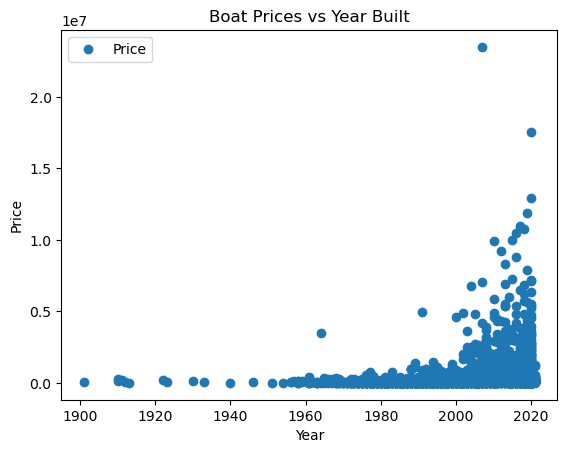

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year Built', y='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Boat Prices vs Year Built')  
plt.xlabel('Year')  
plt.ylabel('Price')  
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Year Built'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [30]:
X

array([[2020],
       [2019],
       [1987],
       ...,
       [1984],
       [2020],
       [2019]])

In [31]:
y


array([[3490],
       [3399],
       [3500],
       ...,
       [4950],
       [4499],
       [3780]])

In [32]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [33]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [34]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

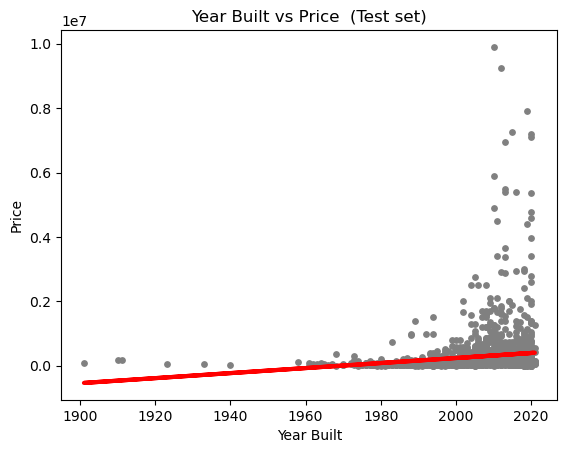

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year Built vs Price  (Test set)')
plot_test.xlabel('Year Built')
plot_test.ylabel('Price')
plot_test.show()

### The analysis of the line's fit to the data indicates a positive correlation between the year the boats were built and their prices over time.

In [37]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [38]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[7811.19014011]]
Mean squared error:  483805898244.9637
R2 score:  0.01552210637861784


In [39]:
y_predicted

array([[263273.97230399],
       [333574.68356497],
       [302329.92300453],
       ...,
       [302329.92300453],
       [396064.20468584],
       [396064.20468584]])

In [40]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,89500,263273.972304
1,325000,333574.683565
2,29900,302329.923005
3,59900,286707.542724
4,83500,161728.500483
5,40000,255462.782164
6,49900,247651.592024
7,269000,349197.063845
8,80000,317952.303285
9,31400,396064.204686


##### Compare how the regression fits the training set

In [41]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [42]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[7811.19014011]]
Mean squared error:  679486297455.6724
R2 score:  0.014235383247085842


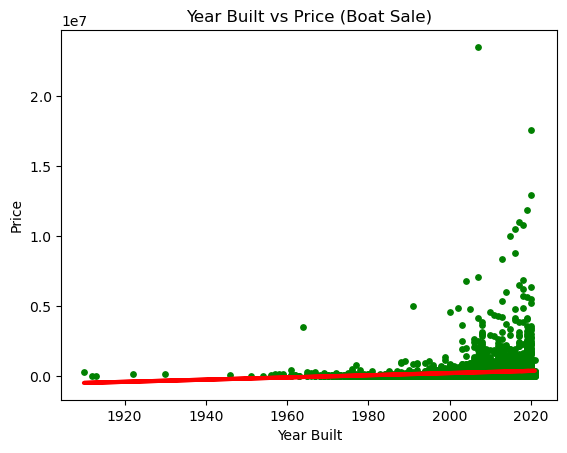

In [45]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Year Built vs Price (Boat Sale)')
plot_test.xlabel('Year Built')
plot_test.ylabel('Price')
plot_test.show()

In [61]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Price'] <=950000] 

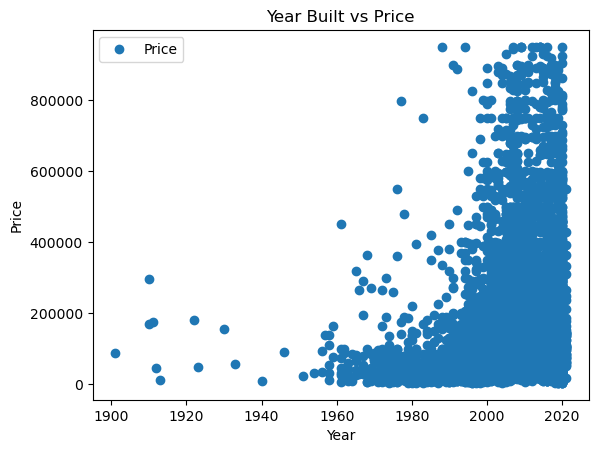

In [71]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Year Built', y='Price', style='o')  
plt.title('Year Built vs Price')  
plt.xlabel('Year')  
plt.ylabel('Price')  
plt.show()

In [64]:
# Reshape again.

X_2 = df_test['Year Built'].values.reshape(-1,1)
y_2 = df_test['Price'].values.reshape(-1,1)

In [65]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [66]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [67]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [68]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [69]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2202.74383585]]
Mean squared error:  31629191572.51117
R2 score:  0.023759511029111224


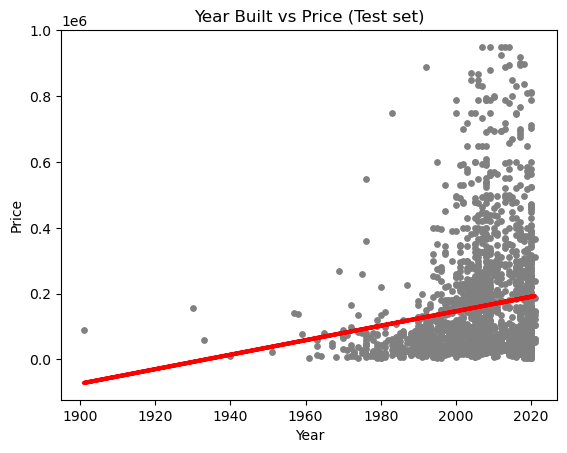

In [72]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Year Built vs Price (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Price')
plot_test.show()

In [73]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,40999,190516.919375
1,44900,179503.200196
2,175000,188314.175539
3,72500,159678.505673
4,419950,172894.968689
5,470000,170692.224853
6,47000,135448.323479
7,299000,144259.298823
8,94000,153070.274166
9,10000,168489.481017


In [76]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(data['Actual'], data['Predicted'])

# Calculate R-squared (R²) Score
r2 = r2_score(data['Actual'], data['Predicted'])

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 31629191572.51117
R² Score: 0.023759511029111224


# Model Performance on the Test Set

The model's performance on the test set, as indicated by the Mean Squared Error (MSE) of 31.63 billion and a very low R² score of 0.02376, shows that the model is not capturing the underlying relationship between the features and the target variable effectively.

The MSE is quite large, which means the predictions are significantly off from the actual values.
The R² score of only 2.38% indicates that the model explains a very small portion of the variance in the actual prices. This low score suggests the model is not generalizing well to unseen data and may not be suitable for accurate predictions.

### Reflections on Possible Data Bias

### Feature Selection:

The model is likely underperforming because it might not have enough relevant features. If the only feature is the year the boat was built, this may not be sufficient to explain the variability in boat prices. Other factors such as brand, boat condition, size, engine type, location, and demand could play a significant role.
The model's performance might improve if more relevant features are included.

### Data Bias:

If the dataset is not representative of the entire population of boats (e.g., focusing on specific brands, regions, or price ranges), the model might be biased and fail to generalize well to other types of boats.
If the data is biased towards a certain time period (e.g., including more recent boats), the model may fail to accurately predict the prices of older or less common boats.

### Outliers:

Extreme values or outliers in the dataset may have skewed the model. For example, very expensive luxury boats could have disproportionately impacted the model's predictions, especially if the dataset includes a few extremely high-priced entries.

### Conclusion
The model currently performs poorly, likely due to limited feature selection or possible data bias. Improving the model by addressing these issues, adding more features, and ensuring the data is well-balanced could lead to better performance.








In [19]:
# Export Data
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Boat Sale_cleaned.csv'), index=False)